# BLACK FRIDAY SALES PREDICTION USING ML TECHNIQUES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv("bftrain.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df.shape

(550068, 12)

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### DATA VISUALISATION

<AxesSubplot:xlabel='Gender', ylabel='count'>

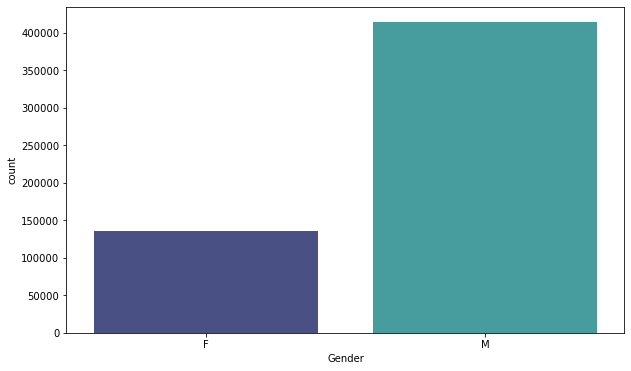

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', palette='mako')

<AxesSubplot:xlabel='Gender', ylabel='Marital_Status'>

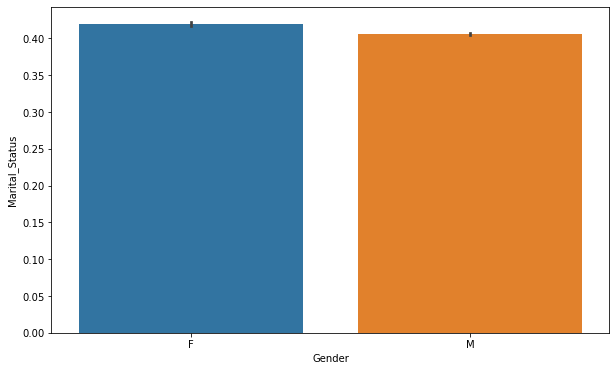

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender',y='Marital_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

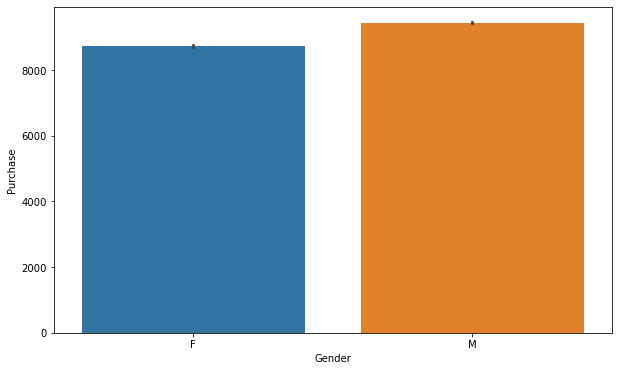

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender',y='Purchase',data=df)

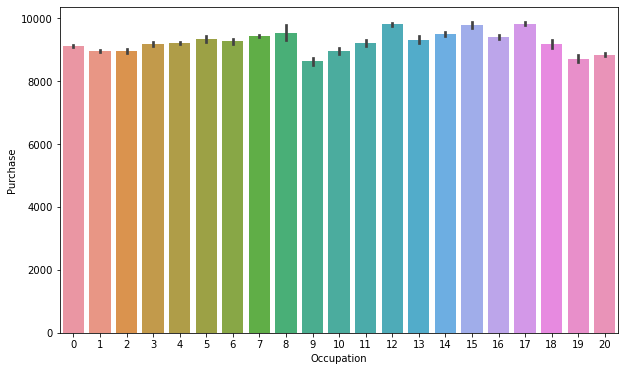

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation',y='Purchase',data=df);

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

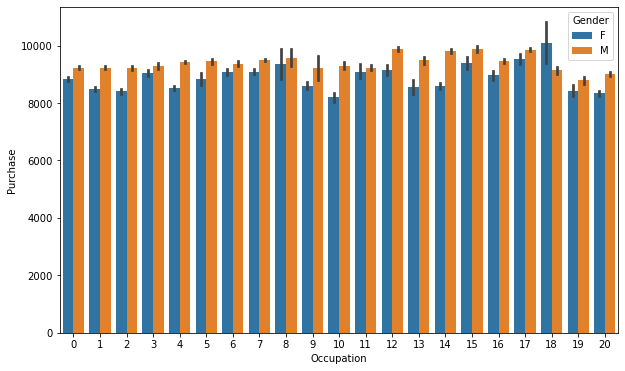

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

### Outlier Detection

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

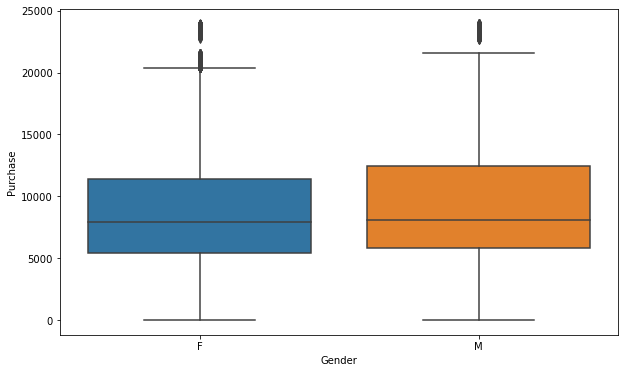

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Gender", y="Purchase")

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

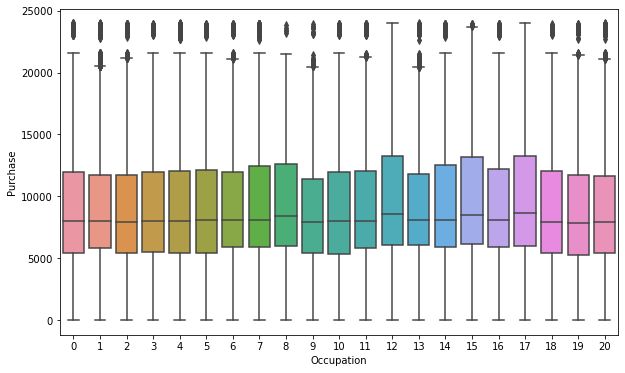

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Occupation", y="Purchase")

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

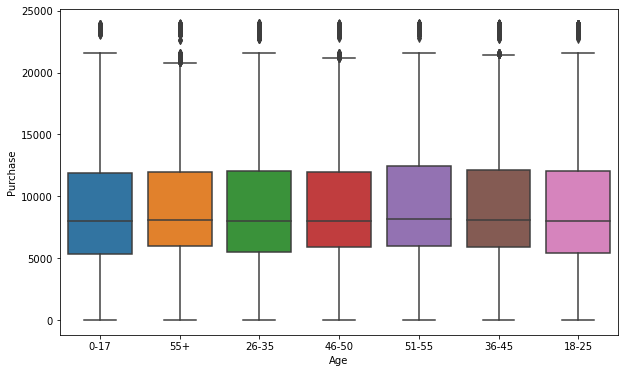

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Age", y="Purchase")

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

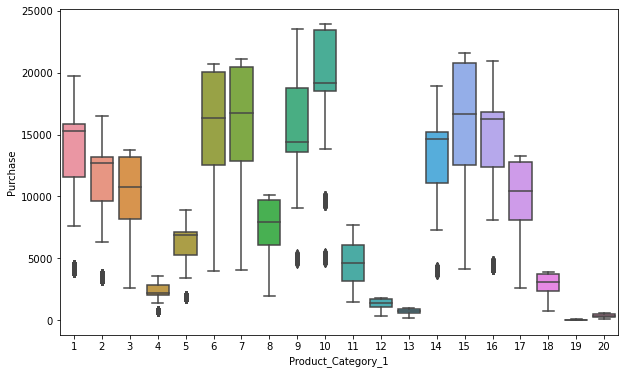

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Product_Category_1", y="Purchase")

### Data Preprocessing 

In [18]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [19]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [20]:
df.drop(['Product_Category_3'],axis=1,inplace=True)
## There are more than 50 percent missing values present in the Product_category_column so we will drop that column.

In [21]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [22]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

### Label Encoding is a technique used to turn categorical variables to numeric values 

In [23]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [24]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [25]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')

In [26]:
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [28]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [29]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.842329,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.000000,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.842329,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.000000,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,1,20,9.842329,368
550064,1006035,P00375436,0,2,1,2,3,0,20,9.842329,371
550065,1006036,P00375436,0,2,15,1,4,1,20,9.842329,137
550066,1006038,P00375436,0,6,1,2,2,0,20,9.842329,365


### Distribution Plot

C:\Users\SURYA KIRAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SURYA KIRAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SURYA KIRAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

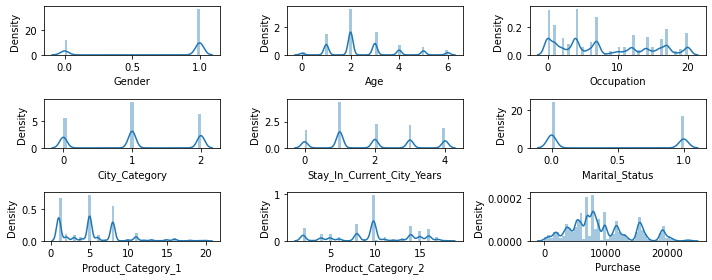

In [30]:
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col=df.columns
index=2
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

### Log transformation

In [31]:
df['Purchase']=np.log(df['Purchase'])
## The log transformation will help us transform the data and change the data to normal distribution

In [32]:
df.drop(['Product_ID'],axis=1,inplace=True)
df.drop(['User_ID'],axis=1,inplace=True)

In [33]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,9.842329,9.032409
1,0,0,10,0,2,0,1,6.000000,9.629051
2,0,0,10,0,2,0,12,9.842329,7.259820
3,0,0,10,0,2,0,12,14.000000,6.963190
4,1,6,16,2,4,0,8,9.842329,8.983314
...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,9.842329,5.908083
550064,0,2,1,2,3,0,20,9.842329,5.916202
550065,0,2,15,1,4,1,20,9.842329,4.919981
550066,0,6,1,2,2,0,20,9.842329,5.899897


### Train Test Split

In [34]:
X=df.drop(labels=['Purchase'],axis=1)                         
Y=df['Purchase']
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,0,0,10,0,2,0,3,9.842329
1,0,0,10,0,2,0,1,6.000000
2,0,0,10,0,2,0,12,9.842329
3,0,0,10,0,2,0,12,14.000000
4,1,6,16,2,4,0,8,9.842329


In [35]:
Y

0         9.032409
1         9.629051
2         7.259820
3         6.963190
4         8.983314
            ...   
550063    5.908083
550064    5.916202
550065    4.919981
550066    5.899897
550067    6.194405
Name: Purchase, Length: 550068, dtype: float64

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
##80 percent data is used for training purpose and 20 percent is used for testing

(440054, 8) (110014, 8) (440054,) (110014,)


## Linear Regression

In [37]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [38]:
Y_predict=model.predict(X_test)

In [39]:
score=r2_score(Y_test,Y_predict)
mae=mean_absolute_error(Y_test,Y_predict)
mse=mean_squared_error(Y_test,Y_predict)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.19319672055861292
mean_absolute_error:  0.4575703787000958
mean_squared_error:  0.448491150614058
root_mean_squared_error:  0.6696948190138983


## Decision Tree Regressor

In [40]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=9)

In [41]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [42]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.377137709146102
RMSE TestData =  0.37877468723140884
--------------------------------------------------
RSquared value on train: 0.7395374390584095
RSquared value on test: 0.7419073284128098


## Random Forest Regressor

In [43]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [44]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [45]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.3239732452768516
RMSE TestData =  0.37820244653873497
--------------------------------------------------
RSquared value on train: 0.8077954424059521
RSquared value on test: 0.7426865756572483


## XGBoost Regressor

In [46]:
XG = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
XG.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [47]:
#predicting train
train_preds2=XG.predict(X_train)
#predicting on test
test_preds2=XG.predict(X_test)

In [48]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds2)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds2)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',XG.score(X_train, Y_train))
print('RSquared value on test:',XG.score(X_test, Y_test))

RMSE TrainingData =  0.3615976968460551
RMSE TestData =  0.3677866269359607
--------------------------------------------------
RSquared value on train: 0.7605600020023062
RSquared value on test: 0.7566644036717094


## Save the Model in Pickle File 

In [53]:


import pickle
#open a file,where you want to store the data
file=open('black_xg.pkl','wb')

#dump information to that file
pickle.dump(XG,file)

In [54]:
model=open('black_xg.pkl','rb')
xg=pickle.load(model)

In [55]:
y_prediction=xg.predict(X_test)

In [56]:
xg.score(X_test, Y_test)

0.7566644036717094